In [1]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
 #아이리스 데이터를 불러옵니다.
df = pd.read_csv('c:/data/data/iris3.csv')

Cloning into 'data'...


In [9]:
# df.iloc[:5,:]
# df.iloc[:50, :]
# df.iloc[50:100, :]
# df.iloc[100:, :]


In [14]:
## 추가
## y값에 따라서 회귀, 이항분류 시그모이드, 이항분류이상의 소프트맥스
## y값이 3개의 카테고리 중 한개를 선택하는 다항분류임으로
## Dense 층의 가장 하단(최우측)의  output은 Dense(3, activation='softmax')
## model.compile(loss='categorical_crossentropy')
## ================================================> y값이 원핫인코딩 되어 있어야함
## ================================================> y값이 숫자이지만 원핫인코딩이 안되어 있다면
##                                model.compile(loss='sparse_categorical_crossentropy')

df.iloc[:,4].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
## 머신러닝, 딥러닝의 데이터셋은 모두 숫자여야함.
## Null값 있으면 안됨
X=df.iloc[:, :4] 
y=df.iloc[:,4]

# y값은 문자이면 안됨.
# 텐서플로우 작업에서는 y값을 레벨인코딩 까지만 해도 됨
# loss에서 원핫인코딩해라 라고 정의할수 있음.

y=pd.get_dummies(y)
y[:3]



,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False


In [21]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)  # 150 개중 *75%는  train.

len(X_train),len(X_test)


(112, 38)

In [18]:
import numpy as np
inNum=np.shape(X)[1]


4

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu')) # x값이4개 w(4)+b(1)=5개파람 *  12개=>60개
model.add(Dense(8,  activation='relu'))  # x값이 12개  w(12)+b(1)=13개파람 * 8개=104개
model.add(Dense(3, activation='softmax')) # x값이 8개 w(8)+b(1)=9개파람 * 3개=27개
model.summary()

# 모델 컴파일
hist=model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(X_train, y_train, 
                  epochs=80, 
                  batch_size=5, 
                  validation_data=(X_test, y_test))  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                60        
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
23/23 [==============================] - 0s 8ms/step - loss: 1.2077 - accuracy: 0.3304 - val_loss: 1.0440 - val_accuracy: 0.3421
Epoch 2/80
23/23 [==============================] - 0s 4ms/step - loss: 0.9759 - accuracy: 0.5179 - val_loss: 0.8951 - val_accuracy: 0.6579
Epoch 3/80
23/23 [======================

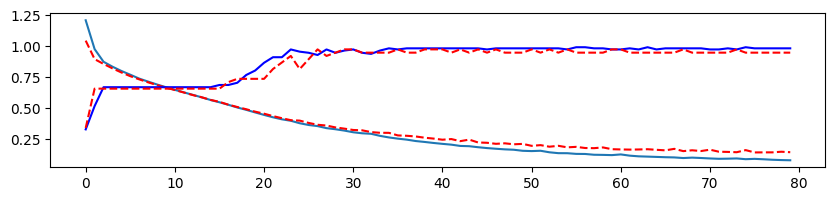

In [35]:
list(history.history)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')

plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r--')



In [50]:
#df.head()
newX=[5.2,3.2,1.5,0.3]

X_train[:3].values

input_newX=np.reshape(newX, (1,-1))
result=model.predict(input_newX) # 3개의 카테고리의 확률값으로 출력이 되고, 다 합치면 1이 됨. 가장 큰 값을 갖고 있는 위치값을 찾아내면 됨
result_num=np.argmax(result)
result_num

In [51]:
class_names=y_train.columns
class_names[result_num]

'Iris-setosa'